In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import missingno as msno # To visualize missing value
import plotly.graph_objects as go # To Generate Graphs
import plotly.express as px # To Generate box plot for statistical representation

In [27]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [28]:
df=pd.read_csv('Heart disease data.csv')

In [29]:
df.head()

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,cleve,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,cleve,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,cleve,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,cleve,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,cleve,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [30]:
df.shape

(920, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
site                 920 non-null object
age                  920 non-null int64
is_male              920 non-null int64
chest_pain           920 non-null int64
rest_blood_press     920 non-null object
cholesterol          920 non-null object
high_blood_sugar     920 non-null object
rest_ecg             920 non-null object
max_heart_rate       920 non-null object
exer_angina          920 non-null object
ST_depression        920 non-null object
Peak_ST_seg          920 non-null object
major_vessels        920 non-null object
thal                 920 non-null object
has_heart_disease    920 non-null int64
dtypes: int64(4), object(11)
memory usage: 107.9+ KB


In [36]:
df['rest_blood_press'].unique()

array(['145', '160', '120', '130', '140', '172', '150', '110', '132',
       '117', '135', '112', '105', '124', '125', '142', '128', '170',
       '155', '104', '180', '138', '108', '134', '122', '115', '118',
       '100', '200', '94', '165', '102', '152', '101', '126', '174',
       '148', '178', '158', '192', '129', '144', '123', '136', '146',
       '106', '156', '154', '114', '164', '95', '?', '80', '185', '116',
       '0', '96', '190', '127', '98', '113', '92'], dtype=object)

In [37]:
df['rest_blood_press'].replace('?','0')

0      145
1      160
2      120
3      130
4      130
      ... 
915    160
916    130
917    155
918    180
919    130
Name: rest_blood_press, Length: 920, dtype: object

In [38]:
df['rest_blood_press']=df['rest_blood_press'].replace('?','0')

In [39]:
df['rest_blood_press'].unique()

array(['145', '160', '120', '130', '140', '172', '150', '110', '132',
       '117', '135', '112', '105', '124', '125', '142', '128', '170',
       '155', '104', '180', '138', '108', '134', '122', '115', '118',
       '100', '200', '94', '165', '102', '152', '101', '126', '174',
       '148', '178', '158', '192', '129', '144', '123', '136', '146',
       '106', '156', '154', '114', '164', '95', '0', '80', '185', '116',
       '96', '190', '127', '98', '113', '92'], dtype=object)

In [44]:
df['rest_blood_press']=df['rest_blood_press'].astype(int)

In [45]:
df.dtypes

site                 object
age                   int64
is_male               int64
chest_pain            int64
rest_blood_press      int32
cholesterol          object
high_blood_sugar     object
rest_ecg             object
max_heart_rate       object
exer_angina          object
ST_depression        object
Peak_ST_seg          object
major_vessels        object
thal                 object
has_heart_disease     int64
dtype: object

In [49]:
df['cholesterol'].unique()

array(['233', '286', '229', '250', '204', '236', '268', '354', '254',
       '203', '192', '294', '256', '263', '199', '168', '239', '275',
       '266', '211', '283', '284', '224', '206', '219', '340', '226',
       '247', '167', '230', '335', '234', '177', '276', '353', '243',
       '225', '302', '212', '330', '175', '417', '197', '198', '290',
       '253', '172', '273', '213', '305', '216', '304', '188', '282',
       '185', '232', '326', '231', '269', '267', '248', '360', '258',
       '308', '245', '270', '208', '264', '321', '274', '325', '235',
       '257', '164', '141', '252', '255', '201', '222', '260', '182',
       '303', '265', '309', '307', '249', '186', '341', '183', '407',
       '217', '288', '220', '209', '227', '261', '174', '281', '221',
       '205', '240', '289', '318', '298', '564', '246', '322', '299',
       '300', '293', '277', '214', '207', '223', '160', '394', '184',
       '315', '409', '244', '195', '196', '126', '313', '259', '200',
       '262', '215',

In [48]:
df.replace('?','NAN',inplace = True)

In [59]:
df.replace('0','NAN')

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,cleve,63,1,1,145,233,1,2,150,NAN,2.3,3,NAN,6,0
1,cleve,67,1,4,160,286,NAN,2,108,1,1.5,2,3,3,2
2,cleve,67,1,4,120,229,NAN,2,129,1,2.6,2,2,7,1
3,cleve,37,1,3,130,250,NAN,NAN,187,NAN,3.5,3,NAN,3,0
4,cleve,41,0,2,130,204,NAN,2,172,NAN,1.4,1,NAN,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,hungary,52,1,4,160,331,NAN,NAN,94,1,2.5,NAN,NAN,NAN,1
916,hungary,54,0,3,130,294,NAN,1,100,1,NAN,2,NAN,NAN,1
917,hungary,56,1,4,155,342,1,NAN,150,1,3,2,NAN,NAN,1
918,hungary,58,0,2,180,393,NAN,NAN,110,1,1,2,NAN,7,1


In [62]:
df['high_blood_sugar'].astype(int)

0      1
1      0
2      0
3      0
4      0
      ..
915    0
916    0
917    1
918    0
919    0
Name: high_blood_sugar, Length: 920, dtype: int32

In [93]:
df['exer_angina']=df['exer_angina'].astype(int)
df['high_blood_sugar']=df['high_blood_sugar'].astype(int)
df['rest_ecg']=df['rest_ecg'].astype(int)
df['max_heart_rate']=df['max_heart_rate'].astype(int)
df['ST_depression']=df['ST_depression'].astype(float)
df['Peak_ST_seg']=df['Peak_ST_seg'].astype(int)
df['major_vessels']=df['major_vessels'].astype(int)
df['thal']=df['thal'].astype(int)                                  

In [94]:
df.dtypes

site                  object
age                    int64
is_male                int64
chest_pain             int64
rest_blood_press       int64
cholesterol            int32
high_blood_sugar       int32
rest_ecg               int32
max_heart_rate         int32
exer_angina            int32
ST_depression        float64
Peak_ST_seg            int32
major_vessels          int32
thal                   int32
has_heart_disease      int64
dtype: object

In [95]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
is_male,920.0,0.789130,0.408148,0.0,1.0,1.0,1.0,1.0
chest_pain,920.0,3.250000,0.930969,1.0,3.0,4.0,4.0,4.0
rest_blood_press,920.0,123.658696,37.271507,0.0,120.0,130.0,140.0,200.0
cholesterol,920.0,192.636957,114.559993,0.0,164.0,221.0,267.0,603.0
high_blood_sugar,920.0,0.150000,0.357266,0.0,0.0,0.0,0.0,1.0
rest_ecg,920.0,0.603261,0.805443,0.0,0.0,0.0,1.0,2.0
max_heart_rate,920.0,129.322826,41.188612,0.0,115.0,138.0,156.0,202.0
exer_angina,920.0,0.366304,0.482056,0.0,0.0,0.0,1.0,1.0
ST_depression,920.0,0.819565,1.076582,-2.6,0.0,0.2,1.5,6.2


In [96]:
df_copy=df.copy()

In [97]:
df_copy

,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease
0,cleve,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,cleve,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,cleve,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,cleve,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,cleve,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,hungary,52,1,4,160,331,0,0,94,1,2.5,0,0,0,1
916,hungary,54,0,3,130,294,0,1,100,1,0.0,2,0,0,1
917,hungary,56,1,4,155,342,1,0,150,1,3.0,2,0,0,1
918,hungary,58,0,2,180,393,0,0,110,1,1.0,2,0,7,1


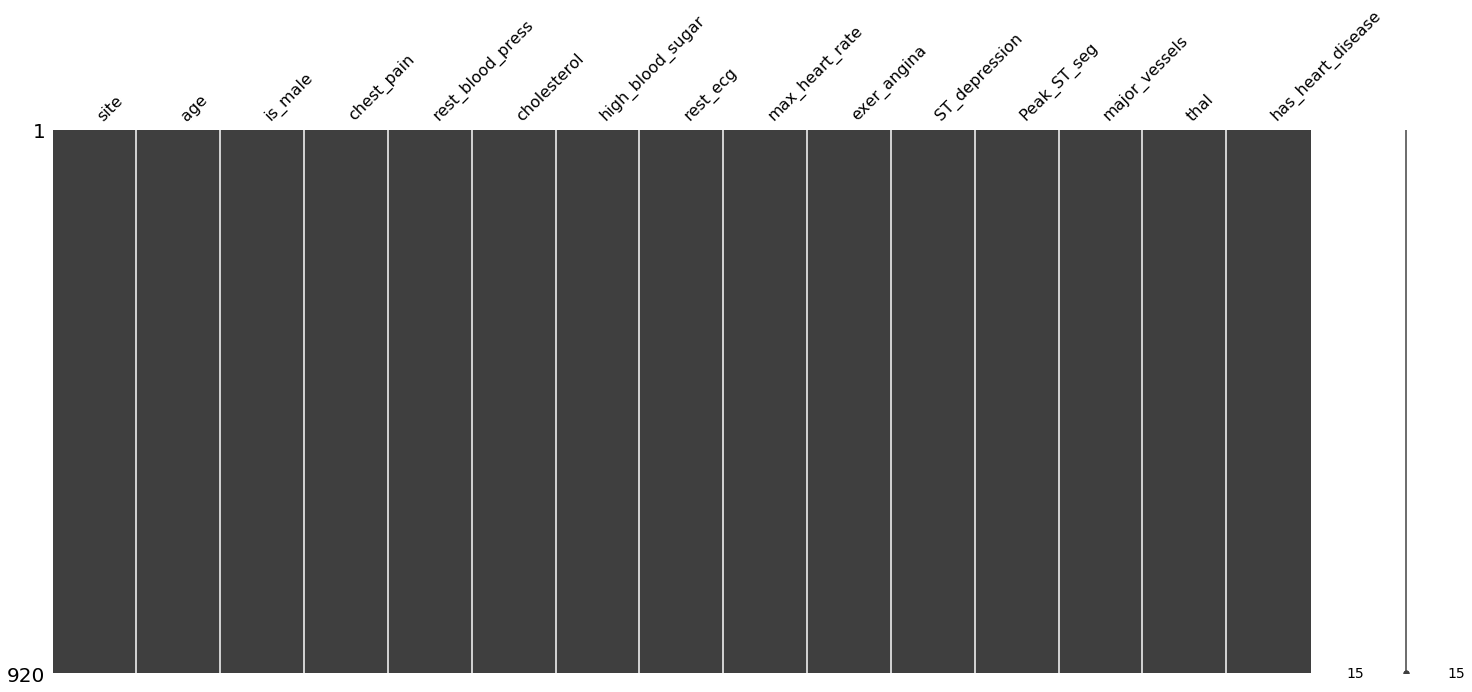

In [98]:
msno.matrix(df_copy)

## check duplicate rows

In [109]:
df_copy.duplicated().sum()

0

In [110]:
duplicated=df_copy[df_copy.duplicated(keep=False)]

In [111]:
duplicated.drop_duplicates()


,site,age,is_male,chest_pain,rest_blood_press,cholesterol,high_blood_sugar,rest_ecg,max_heart_rate,exer_angina,ST_depression,Peak_ST_seg,major_vessels,thal,has_heart_disease


In [112]:
df_copy.shape

(918, 15)

## Statistical analysis

In [113]:
df_copy.describe().T


,count,mean,std,min,25%,50%,75%,max
age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.00,77.0
is_male,918.0,0.789760,0.407701,0.0,1.00,1.0,1.00,1.0
chest_pain,918.0,3.251634,0.931031,1.0,3.00,4.0,4.00,4.0
rest_blood_press,918.0,123.644880,37.299259,0.0,120.00,130.0,140.00,200.0
cholesterol,918.0,192.818083,114.504835,0.0,164.25,221.0,267.00,603.0
high_blood_sugar,918.0,0.150327,0.357586,0.0,0.00,0.0,0.00,1.0
rest_ecg,918.0,0.603486,0.805968,0.0,0.00,0.0,1.00,2.0
max_heart_rate,918.0,129.301743,41.219357,0.0,115.00,138.0,155.75,202.0
exer_angina,918.0,0.366013,0.481976,0.0,0.00,0.0,1.00,1.0
ST_depression,918.0,0.821351,1.077074,-2.6,0.00,0.2,1.50,6.2
